COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) 

In [1]:
import pandas as pd
import numpy as np

In [2]:
compas_df = pd.read_csv('../data/compas-scores-two-years.csv')

In [3]:
compas_df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


<AxesSubplot:title={'center':'Decile Score Histogram by Race'}, xlabel='race', ylabel='% with Decile Score'>

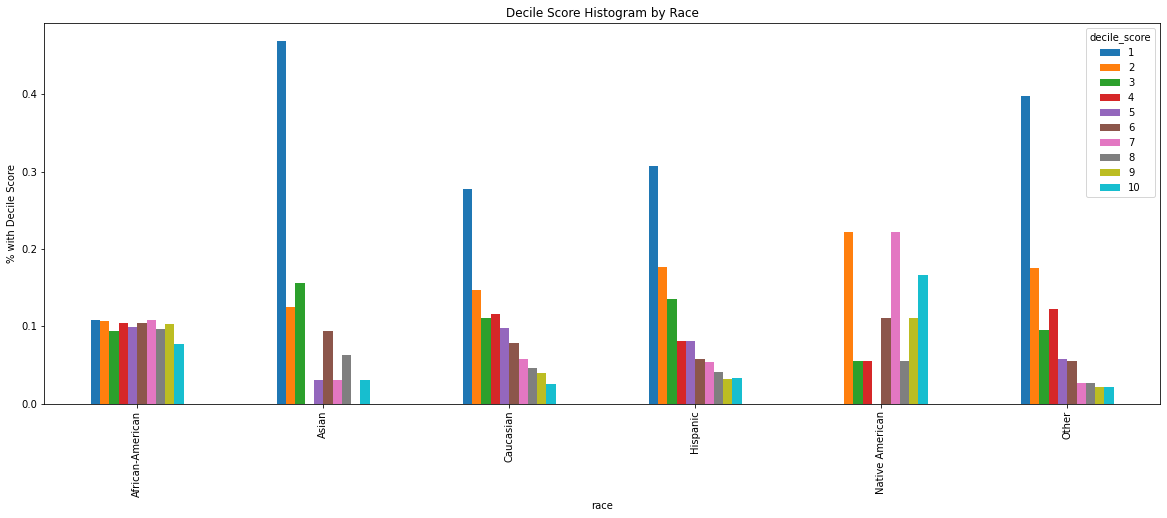

In [4]:
compas_df.groupby('race')['decile_score'].value_counts(
    normalize=True
).unstack().plot(
    kind='bar', figsize=(20, 7),
    title='Decile Score Histogram by Race', ylabel='% with Decile Score'
)

In [5]:
compas_df.groupby('race')['two_year_recid'].mean()

race
African-American    0.514340
Asian               0.281250
Caucasian           0.393643
Hispanic            0.364207
Native American     0.555556
Other               0.352785
Name: two_year_recid, dtype: float64

In [6]:
# Courts generally use  a decile score of 5 to label someone as being medium risk.
compas_df['is_med_or_high_risk'] = (compas_df['decile_score']>=5).astype(bool)


In [7]:
# Hmm, not great if the court's system of 5 or higher on the decile score is only accurate 65% of the time
(compas_df['is_med_or_high_risk']==compas_df['two_year_recid']).mean()


0.6537288605489326

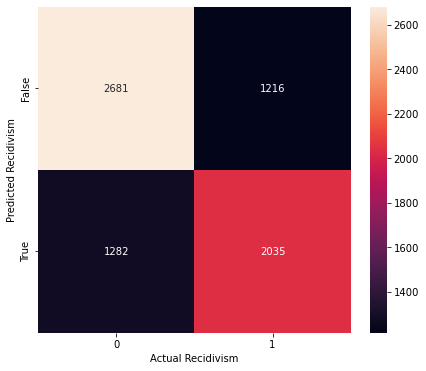

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# heatmap of recidivism
cm = pd.crosstab(
    compas_df['is_med_or_high_risk'], compas_df['two_year_recid'], 
    rownames=['Predicted Recidivism'], colnames=['Actual Recidivism']
)
p = plt.figure(figsize=(7,6))
p = sns.heatmap(cm, annot=True, fmt='d')

<AxesSubplot:title={'center':'Recidivism vs Decile Score'}, xlabel='Decile Score', ylabel='Recidivism Rate'>

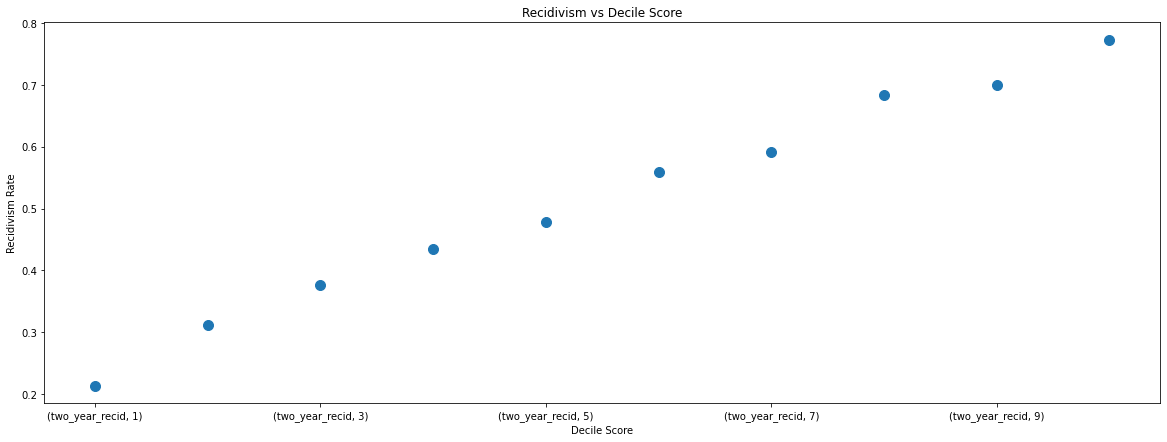

In [9]:
# scatter plot 
compas_df.groupby('decile_score')[['two_year_recid']].mean().unstack().T.plot(
    xlabel='Decile Score', ylabel='Recidivism Rate', title='Recidivism vs Decile Score',
    style='.', figsize=(20, 7),
    ms=20
)

In [10]:
# scatter plot 
compas_df.groupby(
    ['race', 'decile_score']
)[['two_year_recid']].mean().unstack()

two_year_recid                                          \
decile_score                 1         2         3         4         5    
race                                                                      
African-American       0.228643  0.302799  0.419075  0.459740  0.482192   
Asian                  0.066667  0.000000  0.400000       NaN  1.000000   
Caucasian              0.208517  0.313019  0.340659  0.396491  0.460581   
Hispanic               0.244898  0.318584  0.313953  0.346154  0.538462   
Native American             NaN  0.000000  0.000000  1.000000       NaN   
Other                  0.173333  0.378788  0.388889  0.543478  0.454545   

                                                                    
decile_score            6         7         8         9         10  
race                                                                
African-American  0.559896  0.592500  0.682451  0.707895  0.793706  
Asian             0.666667  1.000000  0.500000       NaN  1.000000  
Caucasian         0.572165  0.615385  0.719298  0.693878  0.703125  
Hispanic          0.567568  0.470588  0.500000  0.550000  0.666667  
Native American   0.500000  0.750000  1.000000  0.500000  1.000000  
Other             0.380952  0.500000  0.800000  0.750000  0.750000

<AxesSubplot:title={'center':'Recidivism vs Decile Score by Race'}, xlabel='Decile Score', ylabel='Recidivism Rate'>

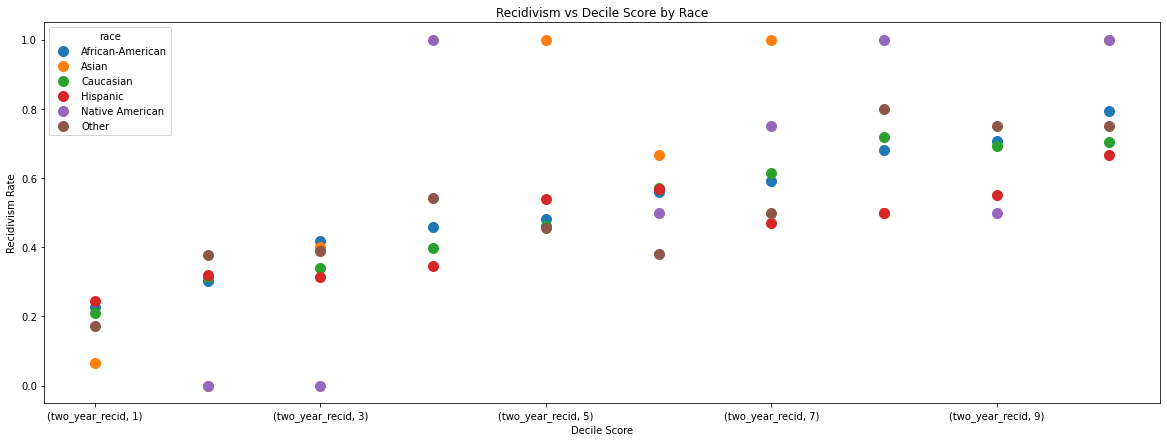

In [11]:
# scatter plot 
compas_df.groupby(
    ['race', 'decile_score']
)[['two_year_recid']].mean().unstack().T.plot(
    xlabel='Decile Score', ylabel='Recidivism Rate', title='Recidivism vs Decile Score by Race',
    style='.', figsize=(20, 7),
    ms=20
)

In [12]:
compas_df = compas_df[["sex", "age", "race", "juv_fel_count", "juv_misd_count",
                 "juv_other_count", "priors_count", "c_charge_degree", "two_year_recid"]]
compas_df.head() 

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid
0,Male,69,Other,0,0,0,0,F,0
1,Male,34,African-American,0,0,0,0,F,1
2,Male,24,African-American,0,0,1,4,F,1
3,Male,23,African-American,0,1,0,1,F,0
4,Male,43,Other,0,0,0,2,F,0


In [13]:
compas_df['race'].value_counts(normalize=True)

African-American    0.512337
Caucasian           0.340172
Hispanic            0.088301
Other               0.052259
Asian               0.004436
Native American     0.002495
Name: race, dtype: float64

In [14]:
compas_df.groupby('race')['two_year_recid'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,3696.0,0.514340,0.499862,0.0,0.0,1.0,1.0,1.0
Asian,32.0,0.281250,0.456803,0.0,0.0,0.0,1.0,1.0
Caucasian,2454.0,0.393643,0.488657,0.0,0.0,0.0,1.0,1.0
Hispanic,637.0,0.364207,0.481585,0.0,0.0,0.0,1.0,1.0
Native American,18.0,0.555556,0.511310,0.0,0.0,1.0,1.0,1.0
Other,377.0,0.352785,0.478472,0.0,0.0,0.0,1.0,1.0


In [15]:
# re-label two races as Other. 
# This is done purely for educational reasons and to avoid addressing issues with a skewed sample in our data
compas_df.loc[compas_df['race'].isin(['Native American', 'Asian']), 'race'] = 'Other'

In [16]:
compas_df.groupby('race')['two_year_recid'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,3696.0,0.514340,0.499862,0.0,0.0,1.0,1.0,1.0
Caucasian,2454.0,0.393643,0.488657,0.0,0.0,0.0,1.0,1.0
Hispanic,637.0,0.364207,0.481585,0.0,0.0,0.0,1.0,1.0
Other,427.0,0.355972,0.479368,0.0,0.0,0.0,1.0,1.0


<AxesSubplot:title={'center':'Actual Recidivism Rates by Race'}, xlabel='race'>

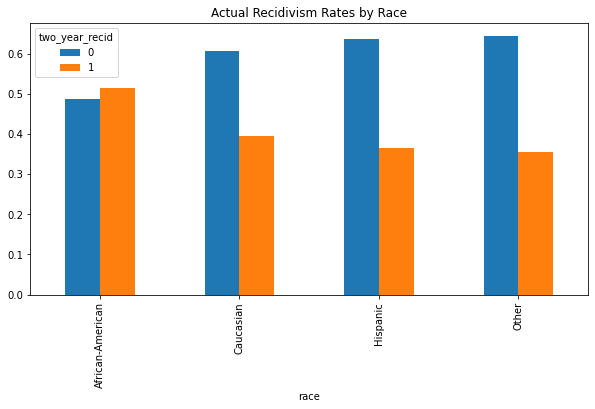

In [17]:
compas_df.groupby('race')['two_year_recid'].value_counts(
    normalize=True
).unstack().plot(
    kind='bar', figsize=(10, 5), title='Actual Recidivism Rates by Race'
)

<AxesSubplot:title={'center':'% of Charge Degree'}, xlabel='Charge Degree', ylabel='%'>

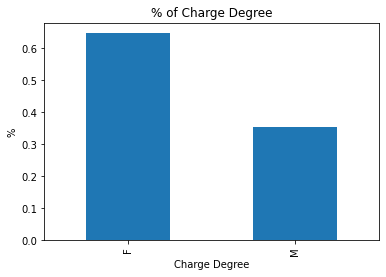

In [18]:
compas_df['c_charge_degree'].value_counts(normalize=True).plot(
    kind='bar', title='% of Charge Degree', ylabel='%', xlabel='Charge Degree'
)

<AxesSubplot:title={'center':'Histogram of Age'}, ylabel='Frequency'>

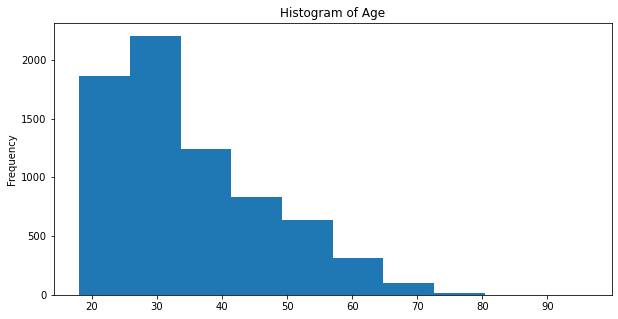

In [19]:
# Right skew on Age
compas_df['age'].plot(
    title='Histogram of Age', kind='hist', xlabel='Age', figsize=(10, 5)
)

<AxesSubplot:title={'center':'Histogram of Priors Count'}, ylabel='Frequency'>

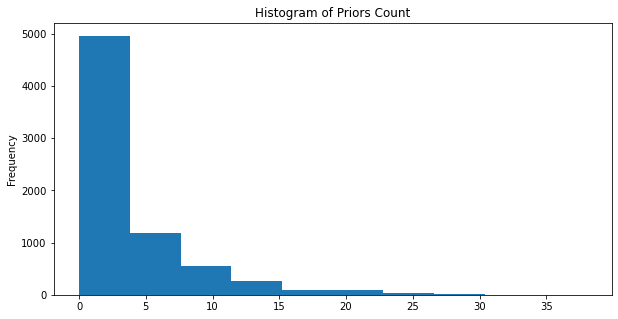

In [20]:
# Right skew on Priors as well
compas_df['priors_count'].plot(
    title='Histogram of Priors Count', kind='hist', xlabel='Priors', figsize=(10, 5)
)

In [21]:
compas_df[["juv_fel_count", "juv_misd_count", "juv_other_count"]].describe()

,juv_fel_count,juv_misd_count,juv_other_count
count,7214.000000,7214.000000,7214.000000
mean,0.067230,0.090934,0.109371
std,0.473972,0.485239,0.501586
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,20.000000,13.000000,17.000000


In [22]:
# feature construction, add up our three juv columns and remove the original features
compas_df['juv_count'] = compas_df[["juv_fel_count", "juv_misd_count", "juv_other_count"]].sum(axis=1)

compas_df[['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'juv_count']].describe()

,juv_fel_count,juv_misd_count,juv_other_count,juv_count
count,7214.000000,7214.000000,7214.000000,7214.000000
mean,0.067230,0.090934,0.109371,0.267535
std,0.473972,0.485239,0.501586,0.952763
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,20.000000,13.000000,17.000000,21.000000


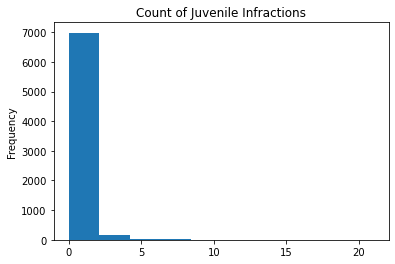

In [23]:
compas_df['juv_count'].plot(
    title='Count of Juvenile Infractions', kind='hist', xlabel='Count'
)

name = 'juv_count'
plt.savefig(f'{name}.svg', dpi=500)
plt.savefig(f'{name}.png', dpi=500)

In [24]:
compas_df['juv_count'].mean(), compas_df['juv_count'].std()

(0.2675353479345717, 0.952763227517296)

In [25]:
compas_df = compas_df.drop(["juv_fel_count", "juv_misd_count", "juv_other_count"], axis=1)

In [26]:
compas_df.head()

,sex,age,race,priors_count,c_charge_degree,two_year_recid,juv_count
0,Male,69,Other,0,F,0,0
1,Male,34,African-American,0,F,1,0
2,Male,24,African-American,4,F,1,1
3,Male,23,African-American,1,F,0,1
4,Male,43,Other,2,F,0,0


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split up our data 
X_train, X_test, y_train, y_test, race_train, race_test = train_test_split(compas_df.drop('two_year_recid', axis=1),
                                                    compas_df['two_year_recid'],
                                                    compas_df['race'],
                                                    stratify=compas_df['two_year_recid'],
                                                    test_size=0.3,
                                                    random_state=0)

# our static classifier
classifier = RandomForestClassifier(max_depth=10, n_estimators=20, random_state=0)

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler


categorical_features = ['race', 'sex', 'c_charge_degree']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary'))
])

numerical_features = ["age", "priors_count"]
numerical_transformer = Pipeline(steps=[
    ('scale', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
])

clf_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])


clf_tree.fit(X_train, y_train)

unaware_y_preds = clf_tree.predict(X_test)

In [62]:
preprocessor.fit_transform(X_train).shape

(5049, 8)

In [63]:
import dalex as dx

exp_tree = dx.Explainer(clf_tree, X_test, y_test, label='Random Forest Bias Unaware', verbose=True)

Preparation of a new explainer is initiated

  -> data              : 2165 rows 6 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 2165 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Bias Unaware
  -> predict function  : <function yhat_proba_default at 0x2863173a0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0, mean = 0.444, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.986, mean = 0.00662, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


In [64]:
exp_tree.model_performance()

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,recall,precision,f1,accuracy,auc
Random Forest Bias Unaware,0.560451,0.628736,0.592633,0.652656,0.69393


In [65]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=unaware_y_preds))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1189
           1       0.63      0.56      0.59       976

    accuracy                           0.65      2165
   macro avg       0.65      0.64      0.65      2165
weighted avg       0.65      0.65      0.65      2165



In [66]:
exp_tree.model_parts().plot()

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

In [67]:
# Recidivism by race in our test set
y_test.groupby(race_test).mean()

race
African-American    0.514652
Caucasian           0.407162
Hispanic            0.327778
Other               0.345324
Name: two_year_recid, dtype: float64

In [68]:
# Predicted Recidivism by race in our bias-unaware model
pd.Series(unaware_y_preds, index=y_test.index).groupby(race_test).mean()

race
African-American    0.508242
Caucasian           0.285146
Hispanic            0.255556
Other               0.381295
dtype: float64

In [69]:
mf_tree = exp_tree.model_fairness(protected=race_test, privileged = "Caucasian")

# TPR(r) = TP / AP                           ( aka sensitivity )
# TNR(r) = TN / AN                           ( aka specificity )
# PPV(r) = TP / (PP)                         ( aka precision )
# NPV(r) = TN / (PN)                    
# FNR(r) = FN / AP  OR 1 - TPR                   
# FPR(r) = FP / AN  OR 1 - TNR                   
# FDR(r) = FP / (PP) OR 1 - PPV
# FOR(r) = FN / (PN) OR 1 - NPV         
# ACC(r) = TP + TN  / (TP + TN + FP + FN)    ( Overall accuracy by Race)
# STP(r) = TP + FP / (TP + FP + FP + FN)     ( aka P[recidivism predicted | Race=r] )

mf_tree.metric_scores

,TPR,TNR,PPV,NPV,FNR,FPR,FDR,FOR,ACC,STP
African-American,0.665,0.658,0.674,0.650,0.335,0.342,0.326,0.350,0.662,0.508
Caucasian,0.407,0.799,0.581,0.662,0.593,0.201,0.419,0.338,0.639,0.285
Hispanic,0.356,0.785,0.447,0.714,0.644,0.215,0.553,0.286,0.644,0.261
Other,0.562,0.714,0.509,0.756,0.438,0.286,0.491,0.244,0.662,0.381


In [70]:
# Each value is the value from the metric_scores table divided by the Causcaian value

mf_tree.fairness_check()

Bias detected in 4 metrics: TPR, PPV, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Caucasian'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                       TPR       ACC       PPV       FPR       STP
African-American  1.633907  1.035994  1.160069  1.701493  1.782456
Hispanic          0.874693  1.007825  0.769363  1.069652  0.915789
Other             1.380835  1.035994  0.876076  1.422886  1.336842


In [71]:
# Caucasian is our privilaged race

# Equal Opportunity Ratio(r)   = TPR(r) / TPR(Caucasian) == TPR from dalex's fairness_check
# Predictive Parity Ratio(r)   = PPV(r) / PPV(Caucasian) == PPV from dalex's fairness_check
# Predictive Equality Ratio(r) = FPR(r) / FPR(Caucasian) == FPR from dalex's fairness_check
# Accuracy Equality Ratio(r)   = ACC(r) / ACC(Caucasian) == ACC from dalex's fairness_check
# Statistical Parity Ratio(r)  = STP(r) / STP(Caucasian) == STP from dalex's fairness_check

In [72]:
mf_tree.plot()  # Same numbers from the fairness_check in a plot

In [73]:
# EG STP Parity Loss:

# STP metrics for unprivileged groups
unpriv_stp = [0.508, 0.261, 0.381]

# STP metrics for privileged group
caucasian_stp = 0.285

# 0.956 appears as light orange in the following figure
sum([abs(np.log(u / caucasian_stp)) for u in unpriv_stp])

0.956271235113839

In [74]:
# Plot of parity loss of each metric
mf_tree.plot(type = 'stacked')

In [75]:
def show_proportions(sensitive_features, y_pred, y=None, description=None):
    print(f'\n{description}\n')
    indices = {}
    positive_indices = {}
    negative_indices = {}
    groups = np.unique(sensitive_features.values)
    n_groups = len(groups)
    max_group_length = max([len(group) for group in groups])
    for index, group in enumerate(groups):
        indices[group] = sensitive_features.index[sensitive_features == group]
        group_recidivism_pct = round(sum(y_pred[indices[group]]) / len(indices[group]), 5)
        buffer = " " * (max_group_length - len(group))
        print(f'P(recidivism | {group})                {buffer}= {group_recidivism_pct}')

        if y is not None:
            positive_indices[group] = sensitive_features.index[
                (sensitive_features == group) & (y == True)
            ]
            negative_indices[group] = sensitive_features.index[
                (sensitive_features == group) & (y == False)
            ]
            prob_1 = round(sum(y_pred[positive_indices[group]]) / len(positive_indices[group]), 5)
            prob_0 = round(sum(y_pred[negative_indices[group]]) / len(negative_indices[group]), 5)
            
            print(f'P(recidivism | {group}, recidivism)    {buffer}= {prob_1}')
            print(f'P(recidivism | {group}, no recidivism) {buffer}= {prob_0}')

In [76]:
show_proportions(
    race_test,
    y_test,
    description="original test data:"
)
show_proportions(
    race_test,
    pd.Series(unaware_y_preds, index=y_test.index),
    y=y_test,
    description="fairness-unaware prediction on test data:"
)
plt.show()


original test data:

P(recidivism | African-American)                = 0.51465
P(recidivism | Caucasian)                       = 0.40716
P(recidivism | Hispanic)                        = 0.32778
P(recidivism | Other)                           = 0.34532

fairness-unaware prediction on test data:

P(recidivism | African-American)                = 0.50824
P(recidivism | African-American, recidivism)    = 0.66548
P(recidivism | African-American, no recidivism) = 0.34151
P(recidivism | Caucasian)                       = 0.28515
P(recidivism | Caucasian, recidivism)           = 0.40717
P(recidivism | Caucasian, no recidivism)        = 0.20134
P(recidivism | Hispanic)                        = 0.25556
P(recidivism | Hispanic, recidivism)            = 0.35593
P(recidivism | Hispanic, no recidivism)         = 0.20661
P(recidivism | Other)                           = 0.38129
P(recidivism | Other, recidivism)               = 0.5625
P(recidivism | Other, no recidivism)            = 0.28571


In [77]:
# Correlating factors to race

In [78]:
compas_df.corrwith(compas_df['race'] == 'African-American').sort_values()

age              -0.179095
juv_count         0.111835
two_year_recid    0.131200
priors_count      0.202897
dtype: float64

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,3696.0,4.438853,5.579835,0.0,1.0,2.0,6.0,38.0
Caucasian,2454.0,2.586797,3.798803,0.0,0.0,1.0,3.0,36.0
Hispanic,637.0,2.252747,3.647673,0.0,0.0,1.0,2.0,26.0
Other,427.0,2.016393,3.695856,0.0,0.0,1.0,2.5,31.0


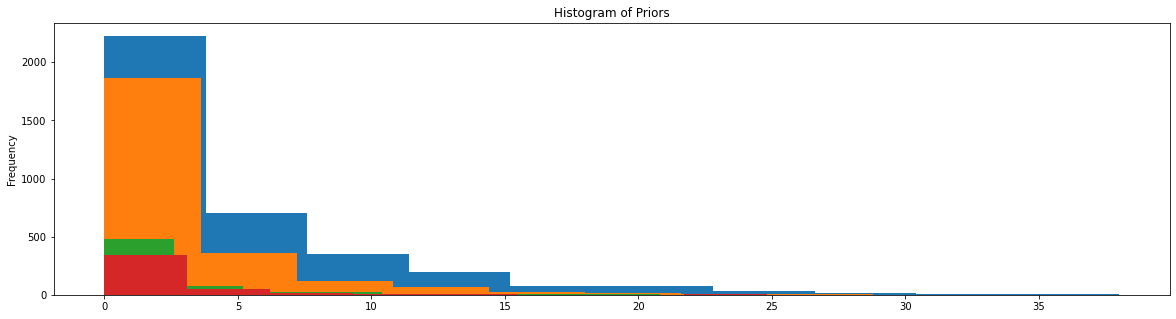

In [79]:
# Priors is extremely skewed by looking at the differences in mean/median/std across the racial categories
compas_df.groupby('race')['priors_count'].plot(
    figsize=(20,5), 
    kind='hist', xlabel='Count of Priors', title='Histogram of Priors'
)
compas_df.groupby('race')['priors_count'].describe()

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,3696.0,32.740801,10.858391,18.0,25.0,30.0,38.00,77.0
Caucasian,2454.0,37.726569,12.761373,18.0,27.0,35.0,47.75,83.0
Hispanic,637.0,35.455259,11.877783,19.0,26.0,33.0,43.00,96.0
Other,427.0,35.131148,11.634159,19.0,25.0,33.0,43.00,76.0


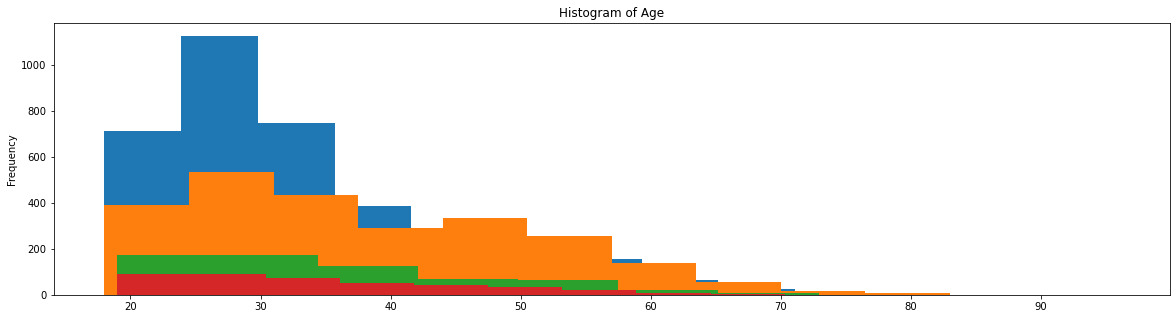

In [80]:
# Age is not very skewed
compas_df.groupby('race')['age'].plot(
    figsize=(20,5), 
    kind='hist', xlabel='Age', title='Histogram of Age'
)
compas_df.groupby('race')['age'].describe()

In [81]:
# https://towardsdatascience.com/ai-fairness-explanation-of-disparate-impact-remover-ce0da59451f1

In [82]:
from sklearn.preprocessing import PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class NormalizeColumnByLabel(BaseEstimator, TransformerMixin):
    def __init__(self, col, label):
        self.col = col
        self.label = label
        self.transformers = {}
        
    def fit(self, X, y=None):
        for group in X[self.label].unique():
            self.transformers[group] = PowerTransformer(
                method='yeo-johnson', standardize=True
            )
            self.transformers[group].fit(
                X.loc[X[self.label]==group][self.col].values.reshape(-1, 1)
            )
        return self
    
    def transform(self, X, y=None):
        C = X.copy()
        for group in X[self.label].unique():
            C.loc[X[self.label]==group, self.col] = self.transformers[group].transform(
                X.loc[X[self.label]==group][self.col].values.reshape(-1, 1)
            )
        return C

,count,mean,std,min,25%,50%,75%,max
race,,,,,,,,
African-American,2604.0,-8.868141e-17,1.000192,-1.394037,-0.549932,-0.092417,0.784661,2.276224
Caucasian,1700.0,-1.347941e-16,1.000294,-1.190914,-1.190914,-0.104396,0.733866,2.293665
Hispanic,457.0,-9.911838e-17,1.001096,-1.124116,-1.124116,0.098333,0.620238,2.060623
Other,288.0,1.572816e-16,1.001741,-0.921525,-0.921525,-0.921525,0.878567,1.871600


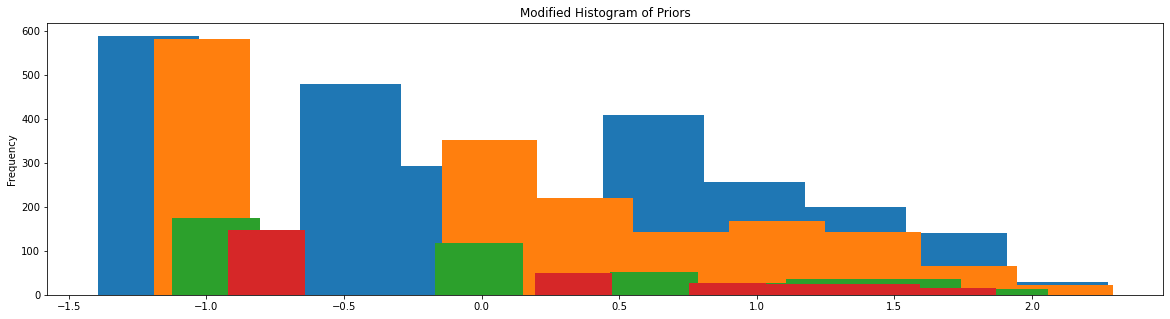

In [83]:
n = NormalizeColumnByLabel(col='priors_count', label='race')

X_train_normalized = n.fit_transform(X_train, y_train)

X_train_normalized.groupby('race')['priors_count'].plot(
    figsize=(20,5), 
    kind='hist', xlabel='Priors', title='Modified Histogram of Priors'
)
X_train_normalized.groupby('race')['priors_count'].describe()

In [84]:
clf_tree_aware = Pipeline(steps=[
    ('normalize_priors', NormalizeColumnByLabel(col='priors_count', label='race')),
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

clf_tree_aware.fit(X_train, y_train)

aware_y_preds = clf_tree_aware.predict(X_test)

In [85]:
print(classification_report(y_true=y_test, y_pred=aware_y_preds))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1189
           1       0.63      0.56      0.59       976

    accuracy                           0.66      2165
   macro avg       0.65      0.65      0.65      2165
weighted avg       0.65      0.66      0.65      2165



In [86]:
exp_tree_aware = dx.Explainer(clf_tree_aware, X_test, y_test, label='Random Forest DIR', verbose=False)
mf_tree_aware = exp_tree_aware.model_fairness(protected=race_test, privileged = "Caucasian")

# performance is virtually unchanged overall
pd.concat([exp.model_performance().result for exp in [exp_tree, exp_tree_aware]])

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

,recall,precision,f1,accuracy,auc
Random Forest Bias Unaware,0.560451,0.628736,0.592633,0.652656,0.693930
Random Forest DIR,0.560451,0.633835,0.594889,0.655889,0.694199


In [87]:
# Still using the same features, note that race has become less important.
exp_tree.model_parts().plot(objects=[exp_tree_aware.model_parts()])

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.appen

In [88]:
# We can see a small drop in parity loss
mf_tree.plot(objects=[mf_tree_aware], type='stacked')

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/fairness/_group_fairness/utils.py:178: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [89]:
mf_tree_aware.fairness_check()

Bias detected in 3 metrics: TPR, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Caucasian'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                       TPR       ACC       PPV       FPR       STP
African-American  1.680798  1.035881  1.148464  1.779487  1.849462
Hispanic          0.930175  1.048362  0.853242  0.933333  0.874552
Other             1.194514  1.021841  0.853242  1.297436  1.186380


In [90]:
show_proportions(
    race_test,
    y_test,
    description="original test data:"
)
show_proportions(
    race_test,
    pd.Series(unaware_y_preds, index=y_test.index),
    y=y_test,
    description="fairness-unaware prediction on test data:"
)
show_proportions(
    race_test,
    pd.Series(aware_y_preds, index=y_test.index),
    y=y_test,
    description="fairness-aware prediction on test data:"
)
plt.show()


original test data:

P(recidivism | African-American)                = 0.51465
P(recidivism | Caucasian)                       = 0.40716
P(recidivism | Hispanic)                        = 0.32778
P(recidivism | Other)                           = 0.34532

fairness-unaware prediction on test data:

P(recidivism | African-American)                = 0.50824
P(recidivism | African-American, recidivism)    = 0.66548
P(recidivism | African-American, no recidivism) = 0.34151
P(recidivism | Caucasian)                       = 0.28515
P(recidivism | Caucasian, recidivism)           = 0.40717
P(recidivism | Caucasian, no recidivism)        = 0.20134
P(recidivism | Hispanic)                        = 0.25556
P(recidivism | Hispanic, recidivism)            = 0.35593
P(recidivism | Hispanic, no recidivism)         = 0.20661
P(recidivism | Other)                           = 0.38129
P(recidivism | Other, recidivism)               = 0.5625
P(recidivism | Other, no recidivism)            = 0.28571

fairne

In [91]:
from aif360.algorithms.preprocessing.lfr import LFR
from aif360.datasets import BinaryLabelDataset

class LFRCustom(BaseEstimator, TransformerMixin):
    def __init__(self, col, protected_col, unprivileged_groups, privileged_groups):
        self.col = col
        self.protected_col = protected_col
        self.TR = None
        self.unprivileged_groups = unprivileged_groups
        self.privileged_groups = privileged_groups
        
    def fit(self, X, y=None):
        d = pd.DataFrame(X, columns=self.col)
        d['response'] = list(y)

        binary_df = BinaryLabelDataset(
            df=d,
            protected_attribute_names=self.protected_col, 
            label_names=['response']
        )

        # Input reconstruction quality - Ax
        # Output prediction error - Ay
        # Fairness constraint - Az

        self.TR = LFR(unprivileged_groups=self.unprivileged_groups,
                 privileged_groups=self.privileged_groups, seed=0,
                 k=2, Ax=0.5, Ay=0.2, Az=0.2,
                 verbose=1
                )
        self.TR.fit(binary_df, maxiter=5000, maxfun=5000)
        return self

    
    def transform(self, X, y=None):
        d = pd.DataFrame(X, columns=self.col)
        if y:
            d['response'] = list(y)
        else:
            d['response'] = False

        binary_df = BinaryLabelDataset(
            df=d,
            protected_attribute_names=self.protected_col, 
            label_names=['response']
        )
        return self.TR.transform(binary_df).convert_to_dataframe()[0].drop(['response'], axis=1)

In [92]:
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)
])

# Right now the aif360 package can only support one privileged and one unprivileged group
privileged_groups = [{'Caucasian': 1}]
unprivileged_groups = [{'Caucasian': 0}]


lfr = LFRCustom(
    col=['African-American', 'Caucasian', 'Hispanic', 'Other', 'Male', 'M'],
    protected_col=sorted(X_train['race'].unique()) ,
    privileged_groups=privileged_groups, 
    unprivileged_groups=unprivileged_groups
)

categorical_pipeline = Pipeline([
    ('transform', categorical_preprocessor),
    ('LFR', lfr),
])

numerical_features = ["age", "priors_count"]
numerical_transformer = Pipeline(steps=[
    ('scale', StandardScaler())
])

numerical_preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features)
])

preprocessor = FeatureUnion([
    ('numerical_preprocessor', numerical_preprocessor),
    ('categorical_pipeline', categorical_pipeline)
])

In [93]:
clf_tree_more_aware = Pipeline(steps=[
    ('normalize_priors', NormalizeColumnByLabel(col='priors_count', label='race')),
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])


clf_tree_more_aware.fit(X_train, y_train)

more_aware_y_preds = clf_tree_more_aware.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/aif360/algorithms/preprocessing/lfr_helpers/helpers.py:62: NumbaWarning:


Compilation is falling back to object mode WITH looplifting enabled because Function "LFR_optim_obj" failed type inference due to: Unknown attribute 'iters' of type recursive(type(CPUDispatcher(<function LFR_optim_obj at 0x28d51fe50>)))

File "../../../../../../opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/aif360/algorithms/preprocessing/lfr_helpers/helpers.py", line 66:
def LFR_optim_obj(params, data_sensitive, data_nonsensitive, y_sensitive,
    <source elided>

    LFR_optim_obj.iters += 1
    ^

During: typing of get attribute at /opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/aif360/algorithms/preprocessing/lfr_helpers/helpers.py (66)

File "../../../../../../opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/aif360/algorithm

250RUNNING THE L-BFGS-B CODE

           * * *

 2225.92608547579
Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.43494D+03    |proj g|=  2.40430D+03

At iterate    1    f=  3.32672D+03    |proj g|=  4.78378D+02

At iterate    2    f=  3.04886D+03    |proj g|=  1.87666D+02

At iterate    3    f=  2.91194D+03    |proj g|=  2.89570D+02

At iterate    4    f=  2.80274D+03    |proj g|=  1.83192D+02

At iterate    5    f=  2.72144D+03    |proj g|=  2.31437D+02

At iterate    6    f=  2.66087D+03    |proj g|=  4.43288D+02

At iterate    7    f=  2.46353D+03    |proj g|=  3.42848D+02

At iterate    8    f=  2.22593D+03    |proj g|=  3.63647D+02
500 
At iterate    9    f=  2.17796D+03    |proj g|=  1.13663D+02

At iterate   10    f=  2.16621D+03    |proj g|=  1.00750D+02

At iterate   11    f=  2.15665D+03    |proj g|=  3.34055D+01

At iterate   12    f=  2.15427D+03    |proj g|=  3.55225D+01

A

4250
At iterate  139    f=  2.14553D+03    |proj g|=  1.14157D+00

At iterate  140    f=  2.14553D+03    |proj g|=  1.33839D+00

At iterate  141    f=  2.14553D+03    |proj g|=  1.49182D+00

At iterate  142    f=  2.14552D+03    |proj g|=  4.33303D+00

At iterate  143    f=  2.14552D+03    |proj g|=  1.68181D+00
 2145.5127282994376
4500
At iterate  144    f=  2.14552D+03    |proj g|=  1.63773D+00

At iterate  145    f=  2.14551D+03    |proj g|=  2.18615D+00

At iterate  146    f=  2.14551D+03    |proj g|=  3.81707D+00

At iterate  147    f=  2.14551D+03    |proj g|=  8.51609D-01

At iterate  148    f=  2.14551D+03    |proj g|=  2.05465D+00

At iterate  149    f=  2.14551D+03    |proj g|=  8.05945D-01

At iterate  150    f=  2.14551D+03    |proj g|=  7.00914D-01

At iterate  151    f=  2.14551D+03    |proj g|=  1.40807D+00

At iterate  152    f=  2.14550D+03    |proj g|=  1.93802D+00
 2145.504231694239
4750
At iterate  153    f=  2.14550D+03    |proj g|=  1.24704D+00

At iterate  154   

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/aif360/algorithms/preprocessing/lfr_helpers/helpers.py:50: NumbaWarning:


Compilation is falling back to object mode WITH looplifting enabled because Function "yhat" failed type inference due to: No implementation of function Function(<built-in function iadd>) found for signature:
 
 >>> iadd(float64, array(float64, 1d, C))
 
There are 18 candidate implementations:
  - Of which 16 did not match due to:
  Overload of function 'iadd': File: <numerous>: Line N/A.
    With argument(s): '(float64, array(float64, 1d, C))':
   No match.
  - Of which 2 did not match due to:
  Operator Overload in function 'iadd': File: unknown: Line unknown.
    With argument(s): '(float64, array(float64, 1d, C))':
   No match for registered cases:
    * (int64, int64) -> int64
    * (int64, uint64) -> int64
    * (uint64, int64) -> int64
    * (uint64, uint64) -> uint64
    * (float32, float32) -> float32
    * (float64, float

In [94]:
print(classification_report(y_true=y_test, y_pred=more_aware_y_preds))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1189
           1       0.64      0.55      0.59       976

    accuracy                           0.66      2165
   macro avg       0.65      0.65      0.65      2165
weighted avg       0.65      0.66      0.65      2165



In [95]:
exp_tree_more_aware = dx.Explainer(clf_tree_more_aware, X_test, y_test, label='Random Forest DIR + LFR', verbose=False)

mf_tree_more_aware = exp_tree_more_aware.model_fairness(protected=race_test, privileged="Caucasian")

pd.concat([exp.model_performance().result for exp in [exp_tree, exp_tree_aware, exp_tree_more_aware]])

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:33: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/model_explanations/_model_performance/utils.py:34: FutureWarning:

The series.appen

,recall,precision,f1,accuracy,auc
Random Forest Bias Unaware,0.560451,0.628736,0.592633,0.652656,0.693930
Random Forest DIR,0.560451,0.633835,0.594889,0.655889,0.694199
Random Forest DIR + LFR,0.550205,0.638526,0.591084,0.656813,0.690756


In [96]:
mf_tree.plot(objects=[mf_tree_aware, mf_tree_more_aware], type='stacked')

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/fairness/_group_fairness/utils.py:178: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/envs/pytorch_env/lib/python3.9/site-packages/dalex/fairness/_group_fairness/utils.py:178: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [97]:
show_proportions(
    race_test,
    y_test,
    description="original test data:"
)
show_proportions(
    race_test,
    pd.Series(unaware_y_preds, index=y_test.index),
    y=y_test,
    description="fairness-unaware prediction on test data:"
)
show_proportions(
    race_test,
    pd.Series(more_aware_y_preds, index=y_test.index),
    y=y_test,
    description="fairness-more-aware prediction on test data:"
)
plt.show()


original test data:

P(recidivism | African-American)                = 0.51465
P(recidivism | Caucasian)                       = 0.40716
P(recidivism | Hispanic)                        = 0.32778
P(recidivism | Other)                           = 0.34532

fairness-unaware prediction on test data:

P(recidivism | African-American)                = 0.50824
P(recidivism | African-American, recidivism)    = 0.66548
P(recidivism | African-American, no recidivism) = 0.34151
P(recidivism | Caucasian)                       = 0.28515
P(recidivism | Caucasian, recidivism)           = 0.40717
P(recidivism | Caucasian, no recidivism)        = 0.20134
P(recidivism | Hispanic)                        = 0.25556
P(recidivism | Hispanic, recidivism)            = 0.35593
P(recidivism | Hispanic, no recidivism)         = 0.20661
P(recidivism | Other)                           = 0.38129
P(recidivism | Other, recidivism)               = 0.5625
P(recidivism | Other, no recidivism)            = 0.28571

fairne

In [98]:
# Recidivism by race in our test set
print(y_test.groupby(race_test).mean())

# Predicted Recidivism by race in our bias-unaware model
pd.Series(more_aware_y_preds, index=y_test.index).groupby(race_test).mean()

race
African-American    0.514652
Caucasian           0.407162
Hispanic            0.327778
Other               0.345324
Name: two_year_recid, dtype: float64


race
African-American    0.496337
Caucasian           0.291777
Hispanic            0.222222
Other               0.280576
dtype: float64

In [99]:
mf_tree.fairness_check()  # 7 / 15 numbers out of the range of (08, 1.25)

Bias detected in 4 metrics: TPR, PPV, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Caucasian'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                       TPR       ACC       PPV       FPR       STP
African-American  1.633907  1.035994  1.160069  1.701493  1.782456
Hispanic          0.874693  1.007825  0.769363  1.069652  0.915789
Other             1.380835  1.035994  0.876076  1.422886  1.336842


In [100]:
mf_tree_aware.fairness_check()  # 4 / 15 numbers out of the range of (08, 1.25)

Bias detected in 3 metrics: TPR, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Caucasian'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                       TPR       ACC       PPV       FPR       STP
African-American  1.680798  1.035881  1.148464  1.779487  1.849462
Hispanic          0.930175  1.048362  0.853242  0.933333  0.874552
Other             1.194514  1.021841  0.853242  1.297436  1.186380


In [101]:
mf_tree_more_aware.fairness_check()  # 3 / 15 numbers out of the range of (08, 1.25)

Bias detected in 3 metrics: TPR, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on 'Caucasian'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
                       TPR       ACC       PPV       FPR       STP
African-American  1.586957  1.042320  1.180243  1.567308  1.698630
Hispanic          0.900966  1.087774  0.953206  0.716346  0.760274
Other             0.956522  1.014107  0.844021  1.057692  0.962329


In [102]:
# Looking deeper, our baseline unaware model had 7 / 15 numbers out of the range of (08, 1.25)
# Our new bias-aware model has only 4 / 15 numbers out of the range of (08, 1.25)

In [103]:
# Overall selection rate = Rate of recidivism predicted overall
# Demographic parity difference = max(STP) - min(STP)
# Demographic parity ratio = min(STP) / max(STP) ( we want closer to 1)

# Overall balanced accuracy = average recall over all response labels

# False positive rate difference = max(FPR) - min(FPR)
# False negative rate difference = max(FNR) - min(FNR)
# Equalized odds difference = max( max(TNR) - min(TNR), max(TPR) - max(TNR) )

# Overall AUC = Overall AUC of classifier

from fairlearn.metrics import (
    MetricFrame,
    selection_rate, demographic_parity_difference, demographic_parity_ratio,
    false_positive_rate, false_negative_rate, true_positive_rate,
    false_positive_rate_difference, false_negative_rate_difference, equalized_odds_difference)
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

# Helper functions
def get_metrics_df(models_dict, y_true, group):
    metrics_dict = {
        "Overall selection rate": (
            lambda x: selection_rate(y_true, x)),
        "Demographic parity difference": (
            lambda x: demographic_parity_difference(y_true, x, sensitive_features=group)),
        "Demographic parity ratio": (
            lambda x: demographic_parity_ratio(y_true, x, sensitive_features=group)),
        "Overall balanced accuracy": (
            lambda x: balanced_accuracy_score(y_true, x)),
        "False positive rate difference": (
            lambda x: false_positive_rate_difference(y_true, x, sensitive_features=group)),
        "False negative rate difference": (
            lambda x: false_negative_rate_difference(y_true, x, sensitive_features=group)),
        "Equalized odds difference": (
            lambda x: equalized_odds_difference(y_true, x, sensitive_features=group)),
        "Overall AUC": (
            lambda x: roc_auc_score(y_true, x))
    }
    df_dict = {}
    for metric_name, metric_func in metrics_dict.items():
        df_dict[metric_name] = [metric_func(preds) for model_name, preds in models_dict.items()]
    return pd.DataFrame.from_dict(df_dict, orient="index", columns=models_dict.keys())

In [104]:
# From Unaware to DIR + LFR, we see

# 1. Virtually no change in AUC and error rate (model performance)
# 2. Better Demographic parity (both difference and ratio)
models_dict = {
    "Unaware": unaware_y_preds, 
    "DIR": aware_y_preds,
    "DIR + LFR": more_aware_y_preds
}
get_metrics_df(models_dict, y_test, race_test)

,Unaware,DIR,DIR + LFR
Overall selection rate,0.401386,0.398614,0.388453
Demographic parity difference,0.252686,0.271123,0.274115
Demographic parity ratio,0.502823,0.474127,0.447724
Overall balanced accuracy,0.644818,0.647341,0.647264
False positive rate difference,0.140167,0.165352,0.177655
False negative rate difference,0.309548,0.301496,0.283702
Equalized odds difference,0.309548,0.301496,0.283702
Overall AUC,0.644818,0.647341,0.647264
